# LBW Übung 4 - MUSTERLÖSUNG - Bruchmechanik mit Jupyter

In dieser Übung sollen die Inhalte der letzten Vorlesungen und Übungen mit _jupyter notebooks_ vertieft werden.

## Aufgabe 4.1: Elastizitätslehre

Legen Sie eine Klasse "Werkstoff" an, die die linearelastischen Eigenschaften ($E, \nu, G$) des Werkstoffes abbildet. Es müssen jeweils zwei Parameter gegeben werden, die Klasse soll automatisch die übrigen Eigenschaften berechnen.

In [1]:
class Werkstoff:
    def __init__(self, name, elastizitaetsmodul=None, querkontraktionszahl=None, schubmodul=None):
        self.name = name
        self.elastizitaetsmodul = elastizitaetsmodul
        self.querkontraktionszahl = querkontraktionszahl
        self.schubmodul = schubmodul

        if self.elastizitaetsmodul is None:
            self.elastizitaetsmodul = 2* self.schubmodul * (1 + self.querkontraktionszahl)

        if self.querkontraktionszahl is None:
            self.querkontraktionszahl = (self.elastizitaetsmodul / (2 * self.schubmodul)) - 1

        if self.schubmodul is None:
            self.schubmodul = self.elastizitaetsmodul / (2 * (1 + self.querkontraktionszahl))

    def print_stiffnesses(self):
        print( f"Elastizitätsmodul: {self.elastizitaetsmodul} N/mm^2")
        print( f"Querkontraktionszahl: {self.querkontraktionszahl} ")
        print( f"Schubmodul: {self.schubmodul} N/mm^2")


Testen Sie ihren Code für einen Stahl mit $E = 210000 MPa$, und $\nu = 0.3$

In [2]:
Stahl = Werkstoff("Stahl", elastizitaetsmodul=210000, querkontraktionszahl=0.3)

Stahl.print_stiffnesses()

Elastizitätsmodul: 210000 N/mm^2
Querkontraktionszahl: 0.3 
Schubmodul: 80769.23076923077 N/mm^2


## Aufgabe 4.2: Spannungen nahe der Rissspitze

In Aufgabe 3.1 wurden bereits die Näherungslösung (Skript 2.105) mit der Westergaard Lösung (Skript 2.103) verglichen. Nun wollen wir die jeweiligen Spannungen in der Rissebene mithilfe Python visuell auswerten. Hierfür verwenden wir die Parameter $\sigma_\infty = 100MPa,   a=20mm$.

Ein Ansatz die Aufgabe umzusetzen ist 1. die Formeln als Funktion umzusetzen, 2. die grundlegenden Parameter zu definieren, 3. die Outputgrößen erstellen und dann 4. die Abbildung zu erstellen

/var/folders/2g/p350cqms1q9cj3c624xqqgtw0000gn/T/ipykernel_21111/3727131483.py:7: RuntimeWarning: divide by zero encountered in divide
  sigma_westergaard = sigma_inf * (np.abs(x) / np.sqrt(np.abs(x)**2 - a**2))
/var/folders/2g/p350cqms1q9cj3c624xqqgtw0000gn/T/ipykernel_21111/3727131483.py:12: RuntimeWarning: divide by zero encountered in divide
  sigma_approx = sigma_inf * np.sqrt(a/(2*r))


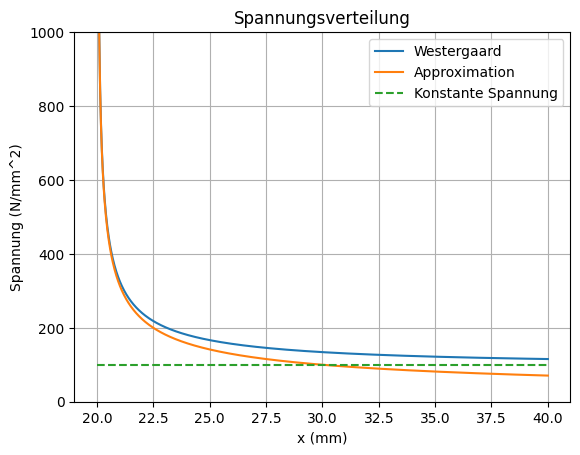

In [3]:
# 0. Import der benötigten Module
import numpy as np
import matplotlib.pyplot as plt

# 1. Definieren der Funktionen zur Berechnung der Spannungen
def calc_westergaard(sigma_inf, a, x):
    sigma_westergaard = sigma_inf * (np.abs(x) / np.sqrt(np.abs(x)**2 - a**2))
    return sigma_westergaard

def calc_approx(sigma_inf, a, x):
    r = np.abs(x) - a
    sigma_approx = sigma_inf * np.sqrt(a/(2*r))
    return sigma_approx

# 2. Definieren der Parameter
sigma_inf = 100  # N/mm^2
a = 20  # mm
x = np.linspace(a, a+20, 1000)  # mm

# 3. Berechnung der Spannungen
sigma_westergaard = calc_westergaard(sigma_inf=sigma_inf, a=a, x=x)
sigma_approx = calc_approx(sigma_inf=sigma_inf, a=a, x=x)

# 4. Ausgabe der Ergebnisse
plt.plot(x, sigma_westergaard, label='Westergaard')
plt.plot(x, sigma_approx, label='Approximation')
plt.plot(x, np.ones_like(x) * sigma_inf, label='Konstante Spannung', linestyle='--')
plt.xlabel('x (mm)')
plt.ylabel('Spannung (N/mm^2)')
plt.title('Spannungsverteilung')
plt.ylim(0, 1000)
plt.legend()
plt.grid()
plt.show()

## Aufgabe 4.3: Rissflankenverschiebung

Jetzt wollen wir die Verschiebung der Rissflanken eines Griffith-Risses für verschiedene Lasten darstellen. Der Riss hat eine halbe Länge von $a = 20 mm$ und ist in einem Werkstoff mit einer Steifigkeit von $5000 MPa$. Es greifen Lasten von $10,20,30 MPa$ an. Diskutieren Sie die Ergebnisse.

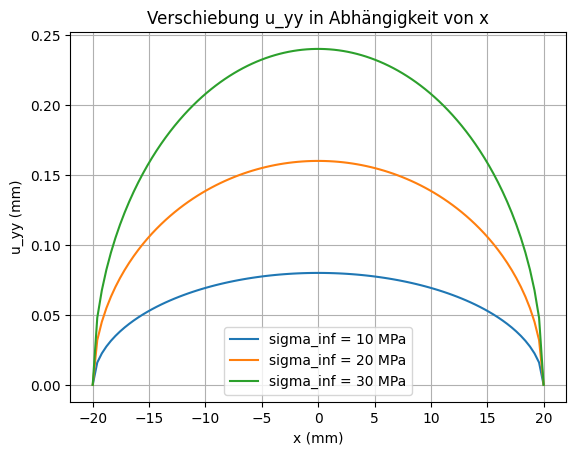

In [4]:
# 0. Importieren der benötigten Module
import numpy as np
import matplotlib.pyplot as plt

# 1. Definieren der Funktion zur Berechnung der Verschiebung
def u_yy(sigma_inf, E, a, x):
    u_yy = (2 * sigma_inf / E) * np.sqrt(a**2 - x**2)
    return u_yy

# 2. Definiere die Parameter
sigma_inf_1 = 10 # MPa
sigma_inf_2 = 20 # MPa
sigma_inf_3 = 30 # MPa
E = 5000 # MPa
a = 20 # mm
x = np.linspace(-a, a, 100) # x-Werte von 0 bis a

# 3. Berechne die Verschiebung für die verschiedenen Spannungen
x_1 = u_yy(sigma_inf=sigma_inf_1, E=E, a=a, x=x)
x_2 = u_yy(sigma_inf=sigma_inf_2, E=E, a=a, x=x)
x_3 = u_yy(sigma_inf=sigma_inf_3, E=E, a=a, x=x)

# 4. Erstelle die Plots
plt.plot(x, x_1, label='sigma_inf = 10 MPa')
plt.plot(x, x_2, label='sigma_inf = 20 MPa')
plt.plot(x, x_3, label='sigma_inf = 30 MPa')
plt.xlabel('x (mm)')
plt.ylabel('u_yy (mm)')
plt.title('Verschiebung u_yy in Abhängigkeit von x')
plt.legend()
plt.grid()
plt.show()

# Aufgabe 4.4: Double Cantilever Beam

Um die Energiefreisetzungsrate zu messen, wreden oft Experimente an Double Cantilever Beams (DCBs) durchgeführt (siehe Abbildung unten). Hierbei wird die Last für unterschiedliche Risslängen gemessen und daraus die Energiefreisetzungsrate ermittelt.

### a) Herleitung der Gleichung für die Bruchzähigkeit

Zeigen Sie, dass gilt:

$\mathcal{G} = \frac{12F^2a^2}{E b^2 (h/2)^3}$

Hierfür können die folgenden Annahmen und Formeln verwendet werden:

I. Der DCB wird als schubstarr angenommen.

II. Die Formänderungsenergie einer Struktur ergibt sich aus den verschiedenen Belastungskomponenten mit 

$ \Pi_i = \frac12 \int \frac{N^2}{EA} \mathrm{d}x + \frac12 \int \frac{M^2}{EI} \mathrm{d}x + \frac12 \int \frac{Q^2}{GAs}   \mathrm{d}x + \frac12 \int \frac{M_T^2}{GI_T} \mathrm{d}x$

III. Beachten Sie den Satz von Clapeyron nachdem gilt: $\Pi_\text{ext} + 2 \Pi_i = 0 \rightarrow \Pi = - \Pi_i$

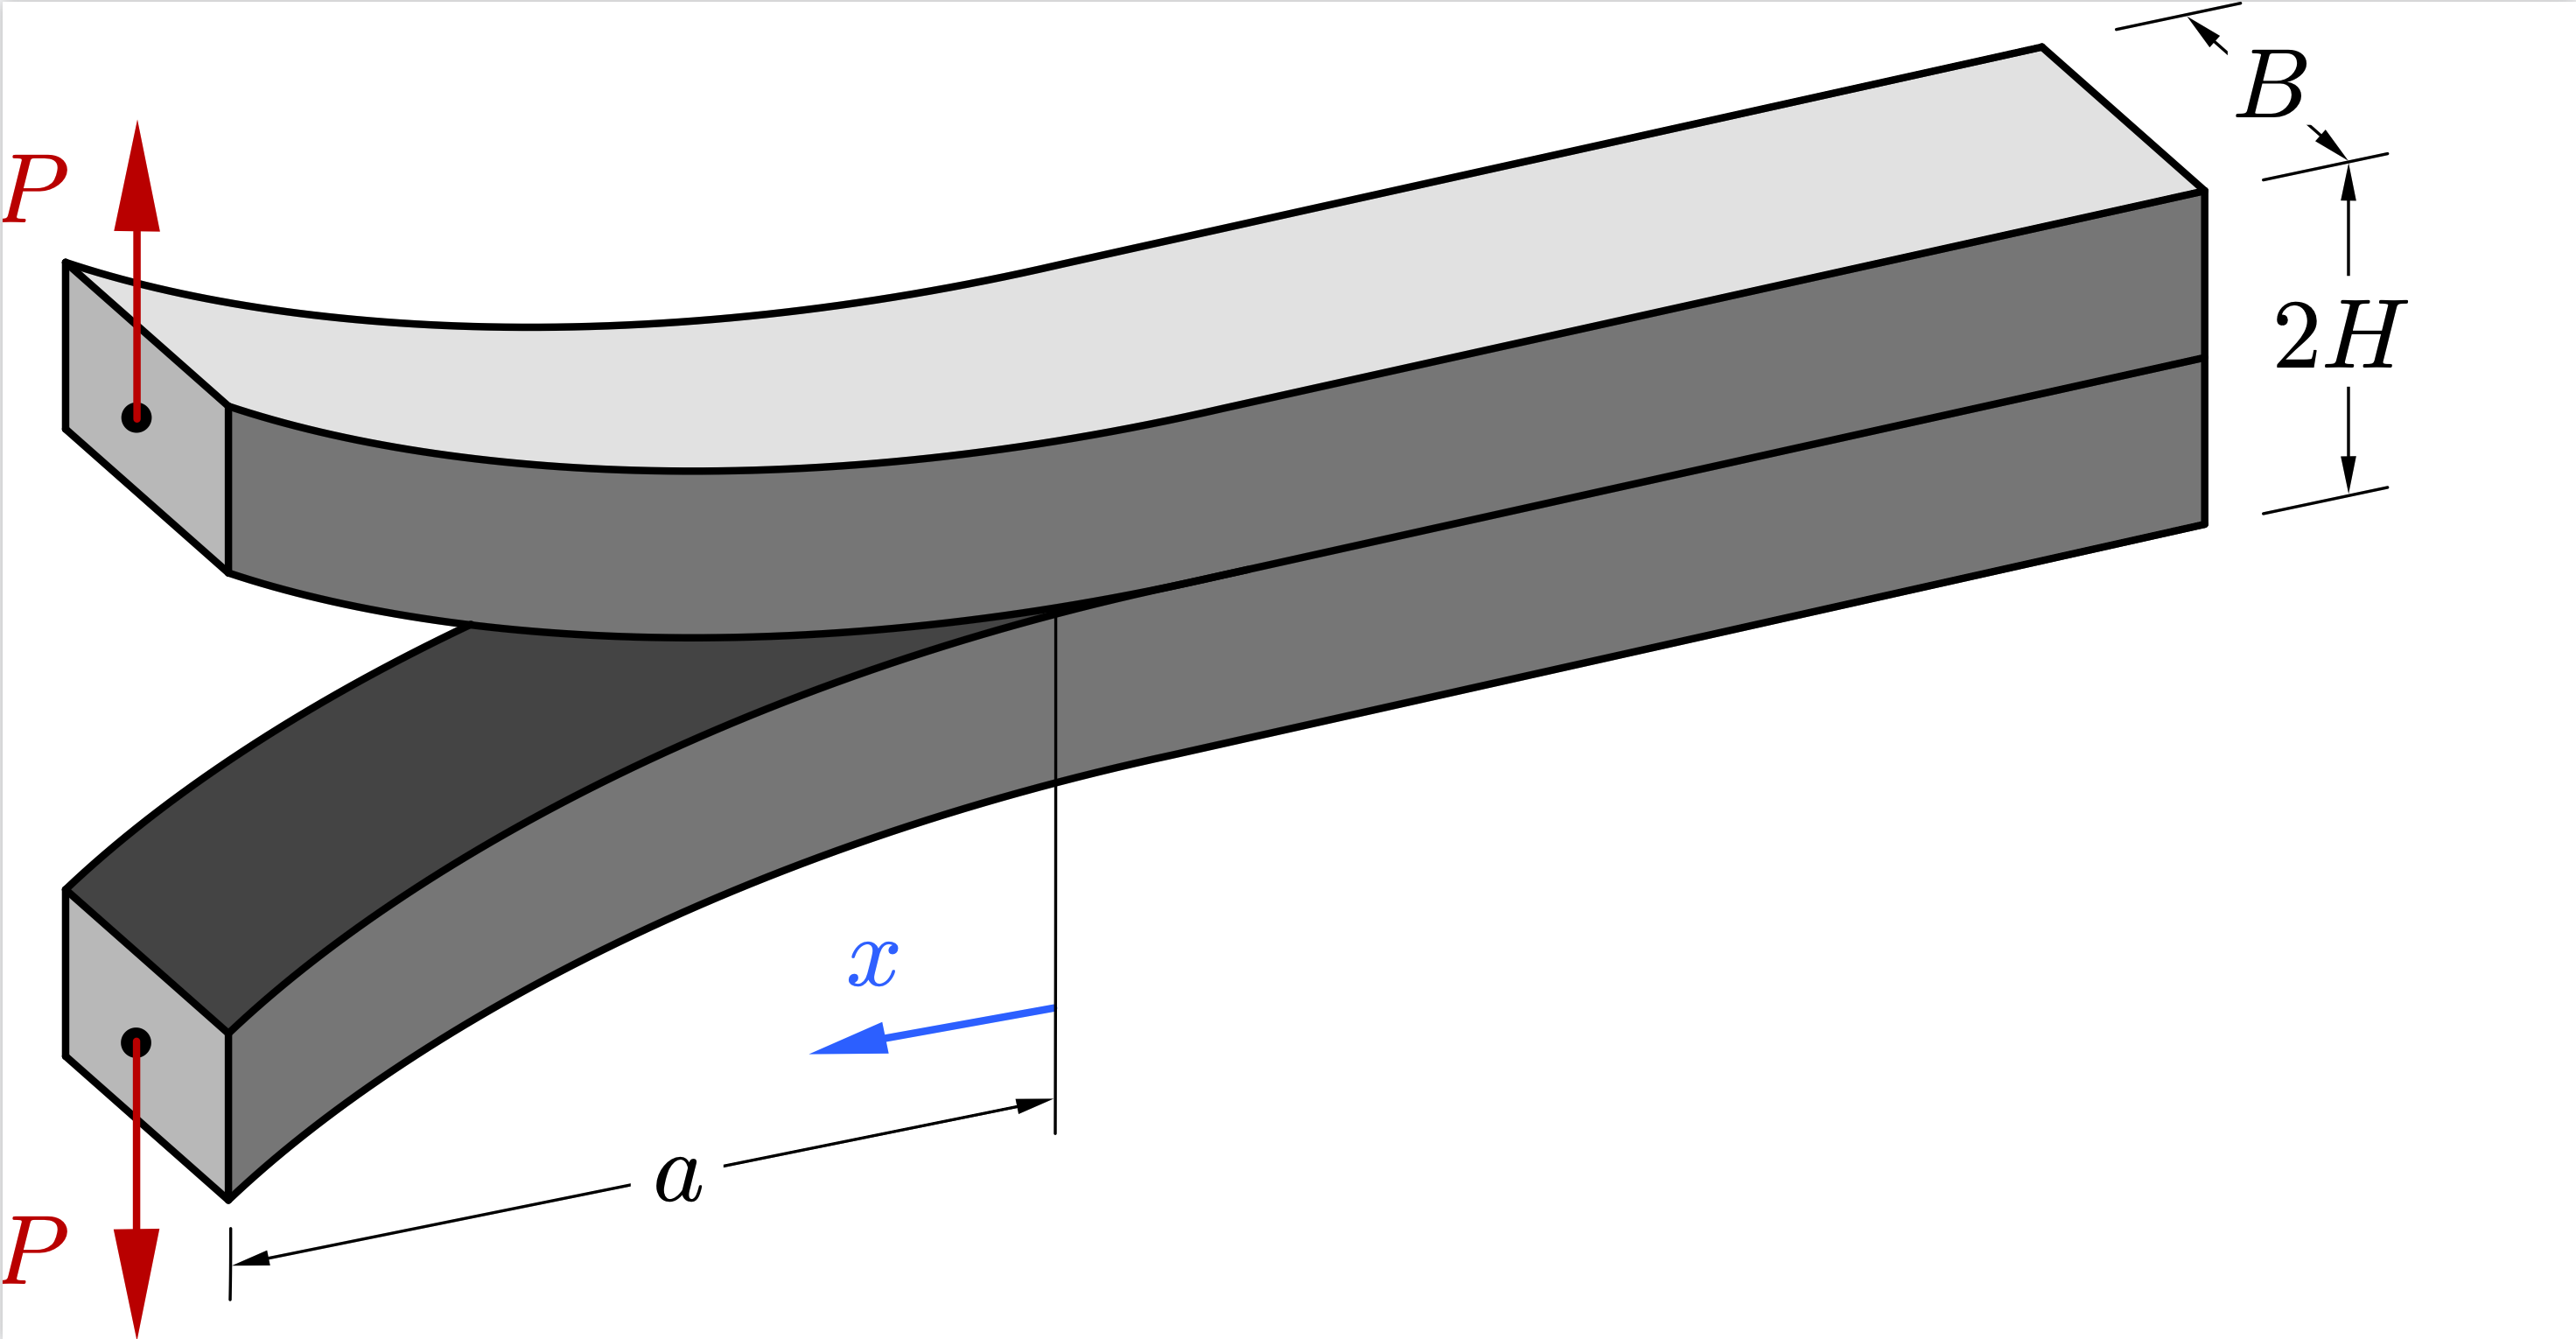

In [5]:
from IPython.display import Image, display

display(Image(filename='figs/LBW_DCB.png'))

### b) Auswertung für Beispieldatensatz 

Werten Sie den Datensatz _Data_DCB.csv_ aus und erstellen sie ein Diagram mit matplotlib, dass die Energiefreisetzungsrate über der Risslänge darstellt.

Die Daten sind von einem Kunststoff mit einem Elastizitätsmodul von $5000 MPa$. Die Probe hat die Maße $b = 2h = 10 mm$.

Zum Einlesen der Daten kann das Modul _pandas_ verwendet werden (Siehe Zelle unterhalb).

In [6]:
# Definieren der Funktion zur Berechnung der Energiefreisetzungsrate
def calc_energy_release_rate_dcb(F, a, E, h, b):
    G = (12 * F**2 * a**2)/(E * b**2 * (h/2)**2)
    return G

In [7]:
# Daten einlesen
import pandas as pd

df_dcb = pd.read_csv('zusatzmaterial/Data_DCB.csv')


print("So können die einzelnen Spalten verarbeitet werden:")
print('Risslänge: ', df_dcb['Risslaenge [mm]'].values)

df_dcb.head()

So können die einzelnen Spalten verarbeitet werden:
Risslänge:  [ 50.96056877  51.15092563  55.52768585  56.08392304  56.27251307
  56.46450713  57.4038111   58.69381283  59.77984596  59.83341487
  59.8727697   60.15035332  60.35485739  60.63086321  61.861393
  63.47569412  64.9300112   65.07502809  65.60154953  66.15379891
  66.66507252  67.14398864  67.85513442  67.97636705  68.09866524
  68.21509143  68.4423915   68.48934962  68.62359152  69.91563682
  70.21217567  71.89801306  72.33016358  72.57265782  76.59317735
  76.67318193  76.88612379  77.26009975  78.04919784  78.09505415
  79.08741357  79.56300335  80.48883176  80.84062375  82.04450978
  82.5661088   82.59593255  82.97553189  83.54074929  84.73501795
  87.62230452  87.78522794  88.1855217   89.2758968   89.7163527
  90.44825809  90.48264049  90.8349816   92.31999537  93.27888414
  94.00389057  94.95011437  95.88114642  97.14808284  97.32805013
  97.93009179  98.82527587  99.05102853  99.50908615  99.81713274
 100.23753038 1

,index,Risslaenge [mm],Kraft [N]
0,0,50.960569,10.113907
1,1,51.150926,9.943234
2,2,55.527686,9.833800
3,3,56.083923,9.766946
4,4,56.272513,9.517629


In [8]:
# Datenaufbereitung

E = 5000  # MPa
h = 5  # mm
b = 10  # mm

x_data = df_dcb['Risslaenge [mm]'].values
y_data = calc_energy_release_rate_dcb(F=df_dcb['Kraft [N]'].values, a=df_dcb['Risslaenge [mm]'].values, E=E, h=h, b=b)

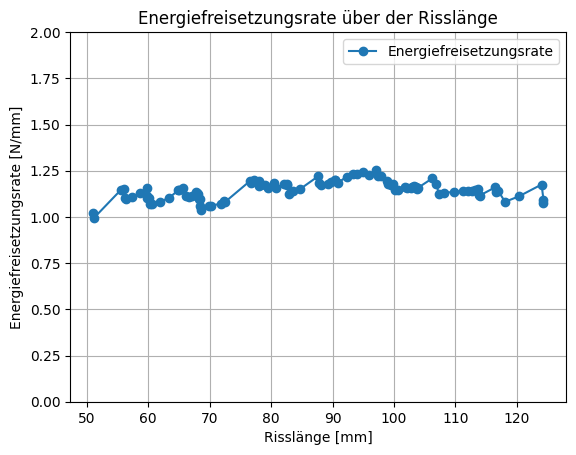

In [9]:
# Datenvisualisierung
plt.plot(x_data, y_data, marker='o', label='Energiefreisetzungsrate')
plt.xlabel('Risslänge [mm]')
plt.ylabel('Energiefreisetzungsrate [N/mm]')
plt.title('Energiefreisetzungsrate über der Risslänge')
plt.legend()
plt.grid()
plt.ylim(0, 2)
plt.show()